<a href="https://colab.research.google.com/github/Data-Science-and-Data-Analytics-Courses/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019/blob/master/Project%202%3A%20Digit%20recognition%20(Part%201)/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction Using PCA



---



## Setup

Cloning into '/nblib'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 32 (delta 15), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (32/32), done.


importing Jupyter notebook from /nblib/Git.ipynb
Cloning into '/content/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 884 (delta 135), reused 0 (delta 0), pack-reused 705
Receiving objects: 100% (884/884), 48.30 MiB | 20.25 MiB/s, done.
Resolving deltas: 100% (477/477), done.
importing Jupyter notebook from /content/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019/setup/Setup.ipynb


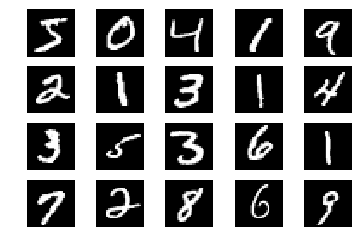

In [1]:
import os, sys
from pathlib import Path

# Notebook Library
url = "https://github.com/Data-Science-and-Data-Analytics-Courses/Notebook-Library"
repo = Path("/nblib")
!git clone "{url}" "{repo}"
if repo.parent.as_posix() not in sys.path:
  sys.path.append(repo.parent.as_posix())
%run "{repo}/.Importable.ipynb"

from nblib import Git
# Remote
URL = "https://github.com/Data-Science-and-Data-Analytics-Courses/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019"
REPO = Git.clone(URL, dest="/content")
if REPO.as_posix() not in sys.path:
  sys.path.append(REPO.as_posix())

# Working directory, for running modules in part1
part1dir = REPO / "Project 2: Digit recognition (Part 1)/mnist/part1"
os.chdir(part1dir)

from setup.Setup import *
import main, features, test

In [9]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def is_linearly_separable(X, y):
    clf = LinearSVC(max_iter=1000000)
    clf.fit(X, y)
    return np.mean(clf.predict(X) == y) == 1.0

# Original points and labels
X = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]])
y = np.array([1, -1, -1, 1])

# Activation functions
def f1(z): return 5*z - 2
def f2(z): return z
def tanh(z): return np.tanh(z)
def relu(z): return np.maximum(z, 0)

activation_functions = [f1, f2, tanh, relu]

for i, f in enumerate(activation_functions):
    X_transformed = f(X)
    separable = is_linearly_separable(X_transformed, y)
    print(f"Activation function {i+1} ({'f1' if i==0 else 'f2' if i==1 else 'tanh' if i==2 else 'relu'}):")
    print(f"Transformed points: {X_transformed}")
    print(f"Linearly separable: {separable}\n")

Activation function 1 (f1):
Transformed points: [[-7 -7]
 [ 3 -7]
 [-7  3]
 [ 3  3]]
Linearly separable: False

Activation function 2 (f2):
Transformed points: [[-1 -1]
 [ 1 -1]
 [-1  1]
 [ 1  1]]
Linearly separable: False

Activation function 3 (tanh):
Transformed points: [[-0.76159416 -0.76159416]
 [ 0.76159416 -0.76159416]
 [-0.76159416  0.76159416]
 [ 0.76159416  0.76159416]]
Linearly separable: False

Activation function 4 (relu):
Transformed points: [[0 0]
 [1 0]
 [0 1]
 [1 1]]
Linearly separable: False



c:\Users\PC\miniconda3\envs\data_venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\PC\miniconda3\envs\data_venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\PC\miniconda3\envs\data_venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\PC\miniconda3\envs\data_venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Testing PCA


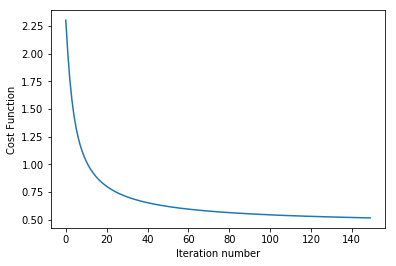

0.1483

In [ ]:
# 18-dimensional PCA features
main.run_softmax_on_MNIST_pcs(temp_parameter=1)

Use plot_PC in main.py to visualize the first 100 MNIST images, as represented in the space spanned by the first 2 principal components of the training data.



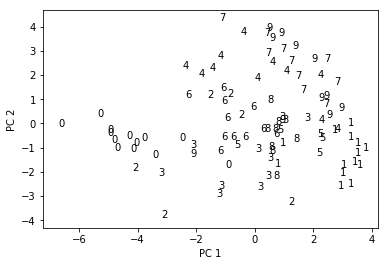

In [ ]:
train_x = main.train_x
train_y = main.train_y
features.plot_PC(train_x[range(100),], main.pcs, train_y[range(100)])

## Cubic Features
In this section, we will work with a cubic feature mapping which maps an input vector  x=[x1,…,xd]  into a new feature vector  ϕ(x) , defined so that for any  x,x′∈Rd :

$$
\phi (x)^ T \phi (x') = (x^ T x' + 1)^3
$$



### Computing Cubic Features
In 2-D, let  x=[x1,x2] . Write down the explicit cubic feature mapping  ϕ(x)  as a vector; i.e.,  ϕ(x)=[f1(x1,x2),⋯,fN(x1,x2)]  


In [ ]:
x1 = sym.Matrix(sym.symarray('x', (1, 2)))
x2 = sym.Matrix(sym.symarray('x`', (1, 2)))
sym.pprint(x1)
sym.pprint(x2)

x1Tx2 = (x1*x2.T)[0, 0]
expr = (x1Tx2 + 1)**3 # ϕ(x)Tϕ(x′)
sym.pprint(sym.expand(expr))

print("ϕ(x)")
phix = sym.Matrix()
sym.pprint([x1[0,0]**3, sym.sqrt(3)*x1[0,0]**2*x1[0,1], sym.sqrt(3)*x1[0,0]**2,
                   sym.sqrt(3)*x1[0,0]*x1[0,1]**2, sym.sqrt(6)*x1[0,0]*x1[0,1], 
                   sym.sqrt(3)*x1[0,0], x1[0,1]**3, sym.sqrt(3)*x1[0,1]**2, sym.sqrt(3)*x1[0,1], 1])

[x₀ ₀  x₀ ₁]
[x`₀ ₀  x`₀ ₁]
    3      3         2           2               2      2              2      
x₀ ₀ ⋅x`₀ ₀  + 3⋅x₀ ₀ ⋅x₀ ₁⋅x`₀ ₀ ⋅x`₀ ₁ + 3⋅x₀ ₀ ⋅x`₀ ₀  + 3⋅x₀ ₀⋅x₀ ₁ ⋅x`₀ ₀

      2                                                3      3         2     
⋅x`₀ ₁  + 6⋅x₀ ₀⋅x₀ ₁⋅x`₀ ₀⋅x`₀ ₁ + 3⋅x₀ ₀⋅x`₀ ₀ + x₀ ₁ ⋅x`₀ ₁  + 3⋅x₀ ₁ ⋅x`₀ 

 2                   
₁  + 3⋅x₀ ₁⋅x`₀ ₁ + 1
ϕ(x)
⎡    3         2              2              2                             3  
⎣x₀ ₀ , √3⋅x₀ ₀ ⋅x₀ ₁, √3⋅x₀ ₀ , √3⋅x₀ ₀⋅x₀ ₁ , √6⋅x₀ ₀⋅x₀ ₁, √3⋅x₀ ₀, x₀ ₁ , 

       2            ⎤
√3⋅x₀ ₁ , √3⋅x₀ ₁, 1⎦


### Applying to MNIST
If we explicitly apply the cubic feature mapping to the original 784-dimensional raw pixel features, the resulting representation would be of massive dimensionality. Instead, we will apply the quadratic feature mapping to the 10-dimensional PCA representation of our training data which we will have to calculate just as we calculated the 18-dimensional representation in the previous problem. After applying the cubic feature mapping to the PCA representations for both the train and test datasets, retrain the softmax regression model using these new features and report the resulting test set error below.

Important: You will probably get a runtime warning for getting the log of 0, ignore. Your code should still run and perform correctly.

Note: Use the same training parameters as the first softmax model given in main.py file and temperature 1.

If you have done everything correctly, softmax regression should perform better (on the test set) using these features than either the 18-dimensional principal components or raw pixels. The error on the test set using cubic features should only be around 0.08, demonstrating the power of nonlinear classification models.



/content/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019/Project 2: Digit recognition (Part 1)/mnist/part1/softmax.py:77: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(prob[Y, range(n)]).mean() # only account prob value for label Y(i)


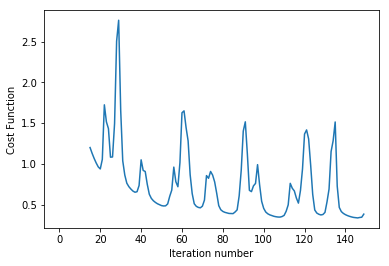

0.0867

In [3]:
main.run_softmax_on_MNIST_cube(temp_parameter=1)